# Players Analysis and Best Player's Predictions

In [147]:
import numpy as np
import pandas as pd 
#for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [148]:
data = pd.read_csv('players_22.csv')
data

C:\Users\soham\AppData\Local\Temp\ipykernel_19720\142435351.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [149]:
new_data = data.drop(['long_name','dob','wage_eur','nation_logo_url','league_level',
                'body_type','work_rate','international_reputation',
                'preferred_foot','nation_jersey_number','nation_position','nation_team_id','nationality_id','club_joined',
                'club_loaned_from','club_jersey_number','club_position','club_team_id','weight_kg','club_contract_valid_until',
                'ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk','player_traits','player_tags','real_face',
           'rw','lam','cam','ram','lm','lcm','cm','rcb','rcm','lwb','ls','st','rs','lw','lf','cf','rf','rm','player_url'
          ], axis=1)

In [150]:
new_data['goalkeeping_speed'] = new_data['goalkeeping_speed'].fillna(0)

new_data['pace'] = new_data['pace'].fillna(0)

new_data['shooting'] = new_data['shooting'].fillna(0)

new_data['dribbling'] = new_data['dribbling'].fillna(0)

new_data['defending'] = new_data['defending'].fillna(0)

new_data['physic'] = new_data['physic'].fillna(0)

new_data['passing'] = new_data['passing'].fillna(0)

new_data['release_clause_eur'] = new_data['release_clause_eur'].fillna(0)

In [151]:
new_data = new_data.dropna()

In [152]:
new_data.isna().sum()

sofifa_id                      0
short_name                     0
player_positions               0
overall                        0
potential                      0
value_eur                      0
age                            0
height_cm                      0
club_name                      0
league_name                    0
nationality_name               0
weak_foot                      0
skill_moves                    0
release_clause_eur             0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_a

In [153]:
new_data

,sofifa_id,short_name,player_positions,overall,potential,value_eur,age,height_cm,club_name,league_name,...,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_face_url,club_logo_url,club_flag_url,nation_flag_url
0,158023,L. Messi,"RW, ST, CF",93,93,78000000.0,34,170,Paris Saint-Germain,French Ligue 1,...,6,11,15,14,8,0.0,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/flags/ar.png
1,188545,R. Lewandowski,ST,92,92,119500000.0,32,185,FC Bayern München,German 1. Bundesliga,...,15,6,12,8,10,0.0,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/pl.png
2,20801,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,36,187,Manchester United,English Premier League,...,7,11,15,14,11,0.0,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/pt.png
3,190871,Neymar Jr,"LW, CAM",91,91,129000000.0,29,175,Paris Saint-Germain,French Ligue 1,...,9,9,15,15,11,0.0,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/flags/br.png
4,192985,K. De Bruyne,"CM, CAM",91,91,125500000.0,30,181,Manchester City,English Premier League,...,15,13,5,10,13,0.0,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,Song Defu,CDM,47,52,70000.0,22,180,Wuhan FC,Chinese Super League,...,6,10,5,15,13,0.0,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,https://cdn.sofifa.net/flags/cn.png
19235,262040,C. Porter,CM,47,59,110000.0,19,175,Derry City,Rep. Ireland Airtricity League,...,11,12,6,8,10,0.0,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,https://cdn.sofifa.net/flags/ie.png
19236,262760,N. Logue,CM,47,55,100000.0,21,178,Finn Harps,Rep. Ireland Airtricity League,...,8,6,7,10,6,0.0,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,https://cdn.sofifa.net/flags/ie.png
19237,262820,L. Rudden,ST,47,60,110000.0,19,173,Finn Harps,Rep. Ireland Airtricity League,...,7,10,7,14,15,0.0,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,https://cdn.sofifa.net/flags/ie.png


In [154]:
new_data.to_csv('New_data.csv', index=False)

In [155]:
Clean_data=pd.read_csv('New_data.csv')
Clean_data

,sofifa_id,short_name,player_positions,overall,potential,value_eur,age,height_cm,club_name,league_name,...,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_face_url,club_logo_url,club_flag_url,nation_flag_url
0,158023,L. Messi,"RW, ST, CF",93,93,78000000.0,34,170,Paris Saint-Germain,French Ligue 1,...,6,11,15,14,8,0.0,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/flags/ar.png
1,188545,R. Lewandowski,ST,92,92,119500000.0,32,185,FC Bayern München,German 1. Bundesliga,...,15,6,12,8,10,0.0,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/pl.png
2,20801,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,36,187,Manchester United,English Premier League,...,7,11,15,14,11,0.0,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/pt.png
3,190871,Neymar Jr,"LW, CAM",91,91,129000000.0,29,175,Paris Saint-Germain,French Ligue 1,...,9,9,15,15,11,0.0,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/flags/br.png
4,192985,K. De Bruyne,"CM, CAM",91,91,125500000.0,30,181,Manchester City,English Premier League,...,15,13,5,10,13,0.0,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19160,261962,Song Defu,CDM,47,52,70000.0,22,180,Wuhan FC,Chinese Super League,...,6,10,5,15,13,0.0,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,https://cdn.sofifa.net/flags/cn.png
19161,262040,C. Porter,CM,47,59,110000.0,19,175,Derry City,Rep. Ireland Airtricity League,...,11,12,6,8,10,0.0,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,https://cdn.sofifa.net/flags/ie.png
19162,262760,N. Logue,CM,47,55,100000.0,21,178,Finn Harps,Rep. Ireland Airtricity League,...,8,6,7,10,6,0.0,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,https://cdn.sofifa.net/flags/ie.png
19163,262820,L. Rudden,ST,47,60,110000.0,19,173,Finn Harps,Rep. Ireland Airtricity League,...,7,10,7,14,15,0.0,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,https://cdn.sofifa.net/flags/ie.png


In [156]:
# converting from float to int
Clean_data = Clean_data.astype({"value_eur":'int', "pace":'int'
                              ,"shooting":'int', "passing":'int'
                                ,"dribbling":'int', "defending":'int'
                                ,"physic":'int', "goalkeeping_speed":'int',"release_clause_eur":'int'
                            }) 

In [157]:
Clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19165 entries, 0 to 19164
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sofifa_id                    19165 non-null  int64 
 1   short_name                   19165 non-null  object
 2   player_positions             19165 non-null  object
 3   overall                      19165 non-null  int64 
 4   potential                    19165 non-null  int64 
 5   value_eur                    19165 non-null  int32 
 6   age                          19165 non-null  int64 
 7   height_cm                    19165 non-null  int64 
 8   club_name                    19165 non-null  object
 9   league_name                  19165 non-null  object
 10  nationality_name             19165 non-null  object
 11  weak_foot                    19165 non-null  int64 
 12  skill_moves                  19165 non-null  int64 
 13  release_clause_eur           19

In [158]:
Clean_data.isna().sum()

sofifa_id                      0
short_name                     0
player_positions               0
overall                        0
potential                      0
value_eur                      0
age                            0
height_cm                      0
club_name                      0
league_name                    0
nationality_name               0
weak_foot                      0
skill_moves                    0
release_clause_eur             0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_a

In [159]:
Clean_data.head()

,sofifa_id,short_name,player_positions,overall,potential,value_eur,age,height_cm,club_name,league_name,...,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_face_url,club_logo_url,club_flag_url,nation_flag_url
0,158023,L. Messi,"RW, ST, CF",93,93,78000000,34,170,Paris Saint-Germain,French Ligue 1,...,6,11,15,14,8,0,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/flags/ar.png
1,188545,R. Lewandowski,ST,92,92,119500000,32,185,FC Bayern München,German 1. Bundesliga,...,15,6,12,8,10,0,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/pl.png
2,20801,Cristiano Ronaldo,"ST, LW",91,91,45000000,36,187,Manchester United,English Premier League,...,7,11,15,14,11,0,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/pt.png
3,190871,Neymar Jr,"LW, CAM",91,91,129000000,29,175,Paris Saint-Germain,French Ligue 1,...,9,9,15,15,11,0,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/flags/br.png
4,192985,K. De Bruyne,"CM, CAM",91,91,125500000,30,181,Manchester City,English Premier League,...,15,13,5,10,13,0,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/be.png


In [160]:
#Intoducted new features to compare and find the best players
# Players given more overall rating based of his public picture is avoided with introduction of this new features

def defending(Clean_data):
    return int(round((Clean_data[['defending_marking_awareness', 'defending_standing_tackle', 
                               'defending_sliding_tackle']].mean()).mean()))

def goalkeeper(Clean_data):
    return int(round((Clean_data[['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 
                               'goalkeeping_positioning','goalkeeping_reflexes','goalkeeping_speed']].mean()).mean()))

def mental(Clean_data):
    return int(round((Clean_data[['mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 
                               'mentality_vision','mentality_penalties','mentality_composure']].mean()).mean()))

def power(Clean_data):
    return int(round((Clean_data[['power_shot_power', 'power_jumping', 'power_stamina','power_strength',
                            'power_long_shots']].mean()).mean()))

def movement(Clean_data):
    return int(round((Clean_data[['movement_acceleration', 'movement_sprint_speed', 'movement_agility','movement_reactions',
                            'movement_balance']].mean()).mean()))

def skills(Clean_data):
    return int(round((Clean_data[['skill_dribbling', 'skill_curve', 'skill_fk_accuracy','skill_long_passing',
                            'skill_ball_control']].mean()).mean()))

def attacking(Clean_data):
    return int(round((Clean_data[['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy','attacking_short_passing',
                            'attacking_volleys']].mean()).mean()))
               
def ratings(Clean_data):
    return int(round((Clean_data[['potential', 'overall']].mean()).mean()))
               
def overall(Clean_data):
    return int(round((Clean_data[['pace', 'shooting', 'passing','dribbling',
                            'physic']].mean()).mean()))


In [161]:
def final(Clean_data):
    return int(round((Clean_data[['attacking', 'skills', 'movement','power','overall',
                                  'defending','mental','defending','goalkeeper'
                            'physic']].mean()).mean()))

In [162]:
Clean_data['Final'] = Clean_data.apply(overall, axis = 1)

In [163]:
# adding these categories to the data
Clean_data['Defending'] = Clean_data.apply(defending, axis = 1)
Clean_data['Goalkeeper'] = Clean_data.apply(goalkeeper, axis = 1)
Clean_data['Mental'] = Clean_data.apply(mental, axis = 1)
Clean_data['Power'] = Clean_data.apply(power, axis = 1)
Clean_data['Movement'] = Clean_data.apply(movement, axis = 1)
Clean_data['Skills'] = Clean_data.apply(skills, axis = 1)
Clean_data['Attacking'] = Clean_data.apply(attacking, axis = 1)
Clean_data['Ratings'] = Clean_data.apply(ratings, axis = 1)
Clean_data['Overall'] = Clean_data.apply(overall, axis = 1)

In [164]:
players = Clean_data[['sofifa_id','short_name','Ratings','player_positions','Overall','Defending','Goalkeeper','Mental','Power',
                'Movement','Skills','Attacking','club_name','value_eur','Final']]
players.head()

,sofifa_id,short_name,Ratings,player_positions,Overall,Defending,Goalkeeper,Mental,Power,Movement,Skills,Attacking,club_name,value_eur,Final
0,158023,L. Messi,93,"RW, ST, CF",86,26,9,74,78,90,94,86,Paris Saint-Germain,78000000,86
1,188545,R. Lewandowski,92,ST,83,32,8,81,85,82,81,86,FC Bayern München,119500000,83
2,20801,Cristiano Ronaldo,91,"ST, LW",85,27,10,74,87,85,84,88,Manchester United,45000000,85
3,190871,Neymar Jr,91,"LW, CAM",83,32,10,77,72,90,89,81,Paris Saint-Germain,129000000,83
4,192985,K. De Bruyne,91,"CM, CAM",84,62,9,83,82,80,88,81,Manchester City,125500000,84


In [165]:
players

,sofifa_id,short_name,Ratings,player_positions,Overall,Defending,Goalkeeper,Mental,Power,Movement,Skills,Attacking,club_name,value_eur,Final
0,158023,L. Messi,93,"RW, ST, CF",86,26,9,74,78,90,94,86,Paris Saint-Germain,78000000,86
1,188545,R. Lewandowski,92,ST,83,32,8,81,85,82,81,86,FC Bayern München,119500000,83
2,20801,Cristiano Ronaldo,91,"ST, LW",85,27,10,74,87,85,84,88,Manchester United,45000000,85
3,190871,Neymar Jr,91,"LW, CAM",83,32,10,77,72,90,89,81,Paris Saint-Germain,129000000,83
4,192985,K. De Bruyne,91,"CM, CAM",84,62,9,83,82,80,88,81,Manchester City,125500000,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19160,261962,Song Defu,50,CDM,47,43,8,42,47,59,43,41,Wuhan FC,70000,47
19161,262040,C. Porter,53,CM,49,43,8,46,49,60,43,43,Derry City,110000,49
19162,262760,N. Logue,51,CM,49,43,6,42,49,57,44,40,Finn Harps,100000,49
19163,262820,L. Rudden,54,ST,48,12,9,38,46,66,38,38,Finn Harps,110000,48


In [172]:
# Split the 'Player Positions' column into three separate columns
#players[['Players_Position', 'P2', 'P3']] = players['player_positions'].str.split(', ', expand=True)
# Drop the original 'Player Positions' column
#players.drop('player_positions', axis=1, inplace=True)
#players.drop('P3', axis=1, inplace=True)
players.drop('P2', axis=1, inplace=True)
players


C:\Users\soham\AppData\Local\Temp\ipykernel_19720\1072606981.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players.drop('P2', axis=1, inplace=True)


,sofifa_id,short_name,Ratings,Overall,Defending,Goalkeeper,Mental,Power,Movement,Skills,Attacking,club_name,value_eur,Final,Players_Position
0,158023,L. Messi,93,86,26,9,74,78,90,94,86,Paris Saint-Germain,78000000,86,RW
1,188545,R. Lewandowski,92,83,32,8,81,85,82,81,86,FC Bayern München,119500000,83,ST
2,20801,Cristiano Ronaldo,91,85,27,10,74,87,85,84,88,Manchester United,45000000,85,ST
3,190871,Neymar Jr,91,83,32,10,77,72,90,89,81,Paris Saint-Germain,129000000,83,LW
4,192985,K. De Bruyne,91,84,62,9,83,82,80,88,81,Manchester City,125500000,84,CM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19160,261962,Song Defu,50,47,43,8,42,47,59,43,41,Wuhan FC,70000,47,CDM
19161,262040,C. Porter,53,49,43,8,46,49,60,43,43,Derry City,110000,49,CM
19162,262760,N. Logue,51,49,43,6,42,49,57,44,40,Finn Harps,100000,49,CM
19163,262820,L. Rudden,54,48,12,9,38,46,66,38,38,Finn Harps,110000,48,ST


In [173]:
players.to_csv('Players.csv', index=False)

In [174]:
players = pd.read_csv('Players.csv')
players

,sofifa_id,short_name,Ratings,Overall,Defending,Goalkeeper,Mental,Power,Movement,Skills,Attacking,club_name,value_eur,Final,Players_Position
0,158023,L. Messi,93,86,26,9,74,78,90,94,86,Paris Saint-Germain,78000000,86,RW
1,188545,R. Lewandowski,92,83,32,8,81,85,82,81,86,FC Bayern München,119500000,83,ST
2,20801,Cristiano Ronaldo,91,85,27,10,74,87,85,84,88,Manchester United,45000000,85,ST
3,190871,Neymar Jr,91,83,32,10,77,72,90,89,81,Paris Saint-Germain,129000000,83,LW
4,192985,K. De Bruyne,91,84,62,9,83,82,80,88,81,Manchester City,125500000,84,CM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19160,261962,Song Defu,50,47,43,8,42,47,59,43,41,Wuhan FC,70000,47,CDM
19161,262040,C. Porter,53,49,43,8,46,49,60,43,43,Derry City,110000,49,CM
19162,262760,N. Logue,51,49,43,6,42,49,57,44,40,Finn Harps,100000,49,CM
19163,262820,L. Rudden,54,48,12,9,38,46,66,38,38,Finn Harps,110000,48,ST


D:\All\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


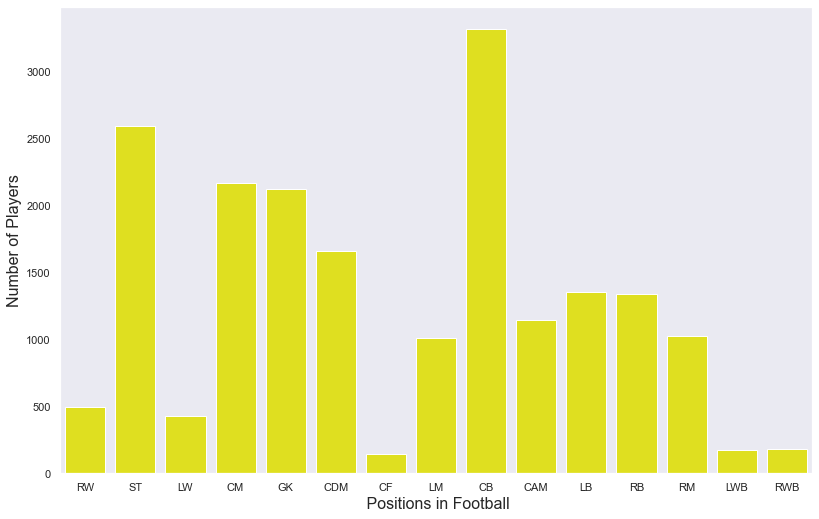

In [182]:
# different positions acquired by the players 

plt.figure(figsize = (12, 8))
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
ax = sns.countplot('Players_Position', data = players, color = 'yellow')
ax.set_xlabel(xlabel = ' Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
plt.show()

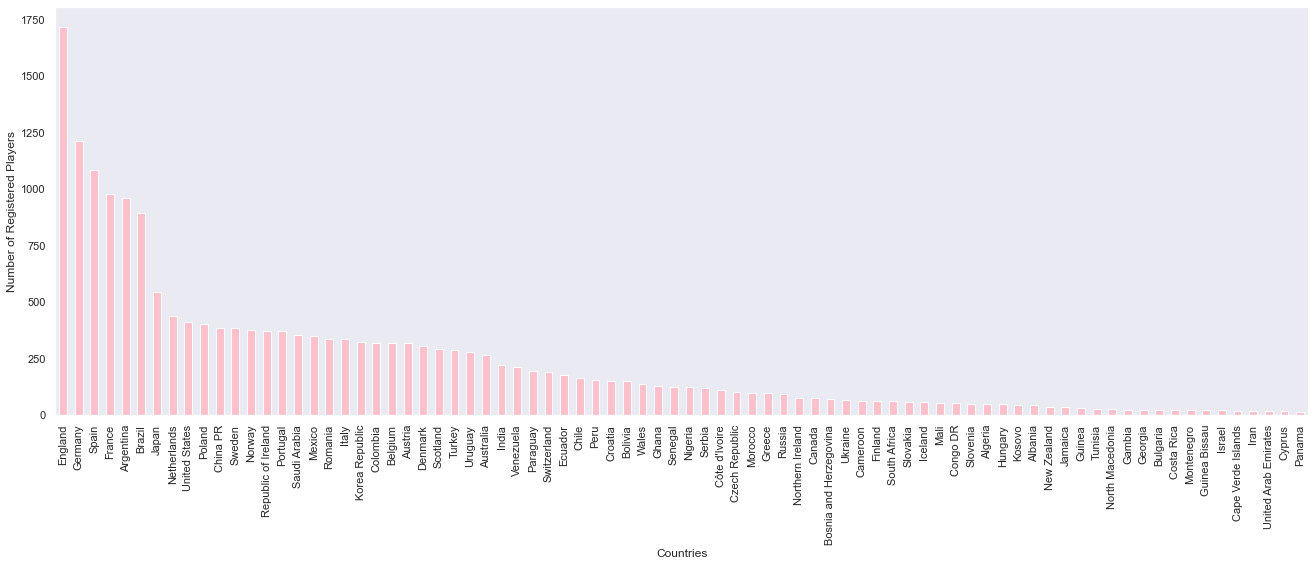

In [180]:
# To show Different nations participating in the FIFA 2022

data['nationality_name'].value_counts().head(80).plot.bar(color = 'pink', figsize = (20, 7))
plt.xlabel('Countries')
plt.ylabel('Number of Registered Players')
plt.show()

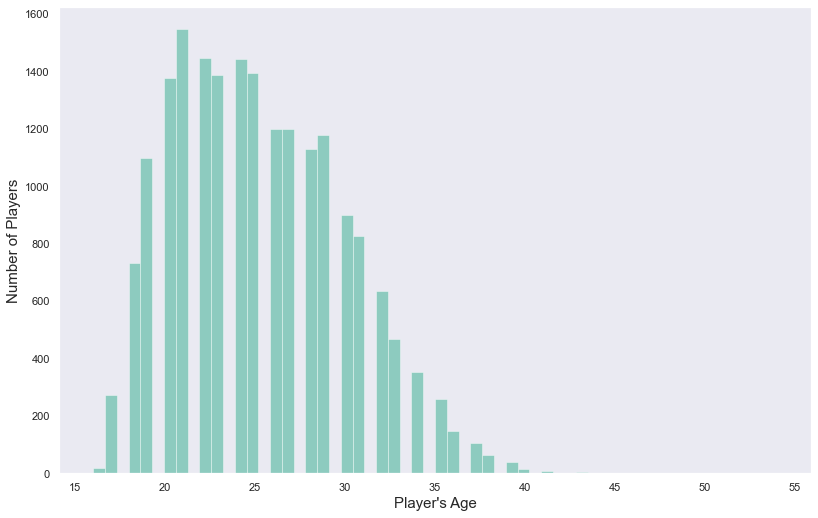

In [185]:
# To show that there are people having same age
# Histogram: number of players's age

sns.set(style = "dark", palette = "colorblind", color_codes = True)
x = data.age
plt.figure(figsize = (12,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Player's Age", fontsize = 15)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 15)
plt.show()

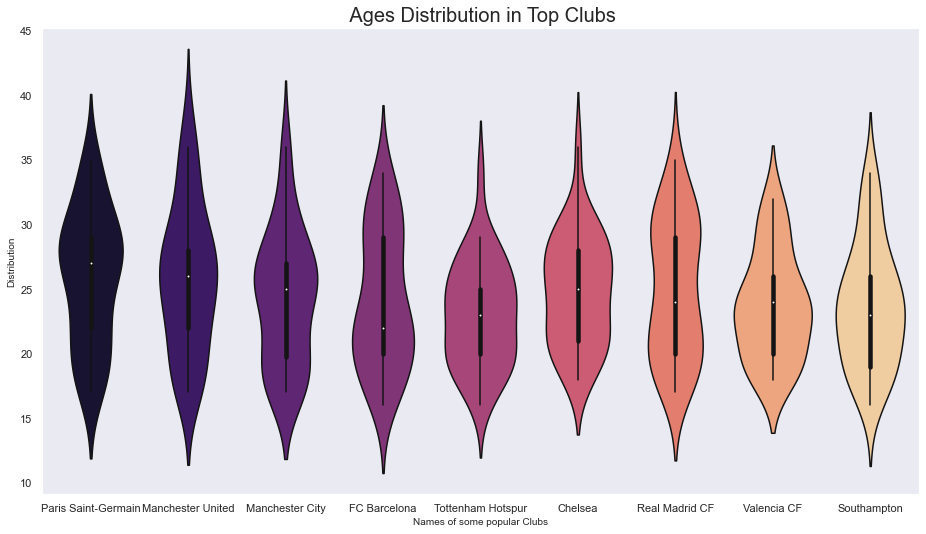

In [190]:
# Distribution of Ages in some Popular clubs

some_clubs = ('FC Bayern MÃ¼nchen', 'Real Madrid CF','Southampton', 'RC Celta', 'Manchester United', 
              'Paris Saint-Germain', 'Manchester City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea')

data_club = data.loc[data['club_name'].isin(some_clubs) & data['wage_eur']]

plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.violinplot(x = 'club_name', y = 'age', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = ' Ages Distribution in Top Clubs', fontsize = 20)
plt.show()

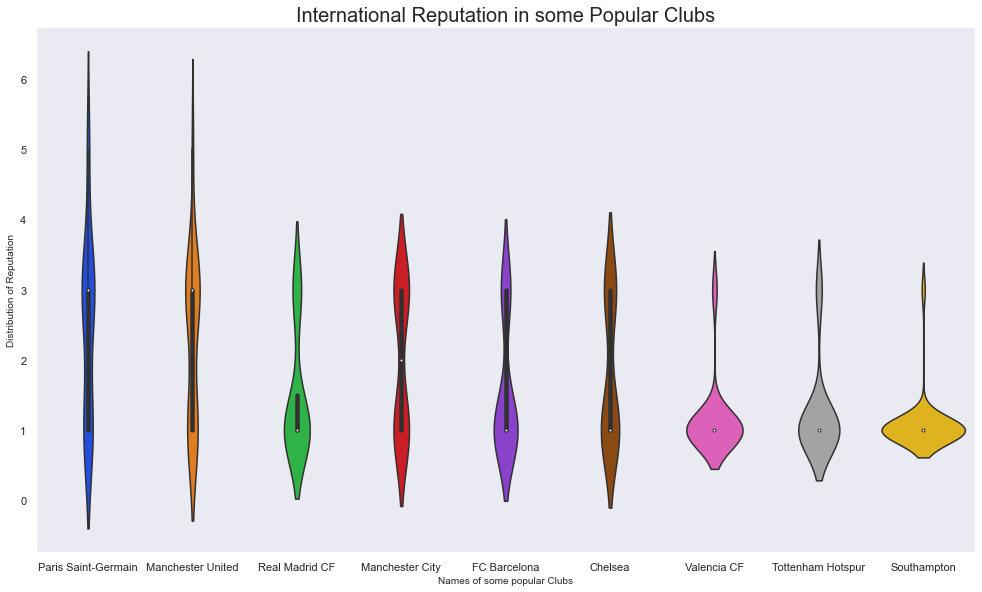

In [188]:
# Distribution of Wages in some Popular clubs

some_clubs = ('FC Bayern MÃ¼nchen', 'Real Madrid CF','Southampton', 'RC Celta', 'Manchester United', 
              'Paris Saint-Germain', 'Manchester City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea')

data_club = data.loc[data['club_name'].isin(some_clubs) & data['international_reputation']]

plt.rcParams['figure.figsize'] = (15, 9)
ax = sns.violinplot(x = 'club_name', y = 'international_reputation', data = data_club, palette = 'bright')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution of Reputation', fontsize = 10)
ax.set_title(label = 'International Reputation in some Popular Clubs', fontsize = 20)
plt.show()

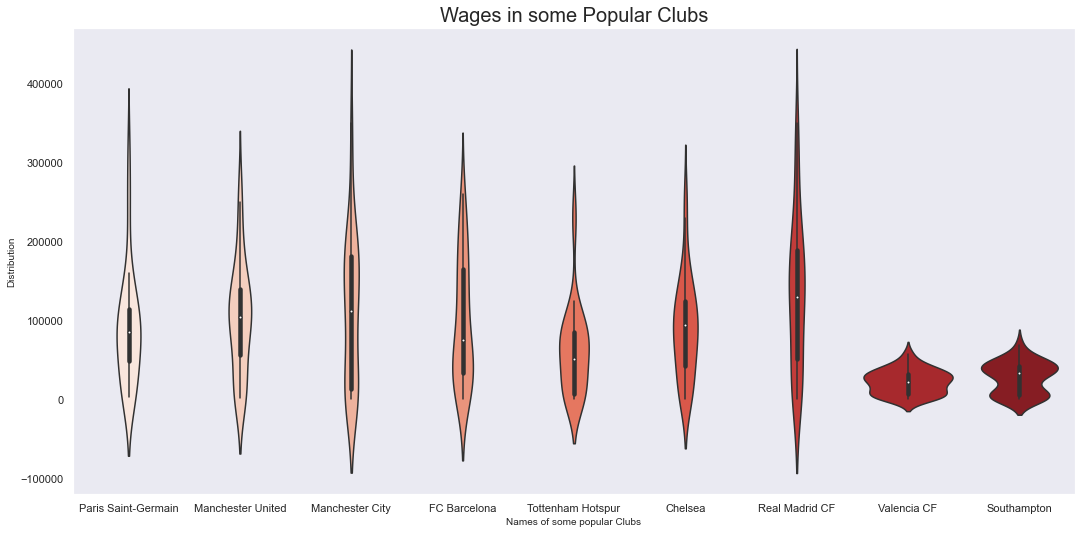

In [191]:
# Distribution of Wages in some Popular clubs

some_clubs = ('FC Bayern MÃ¼nchen', 'Real Madrid CF','Southampton', 'RC Celta', 'Manchester United', 
              'Paris Saint-Germain', 'Manchester City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea')

data_club = data.loc[data['club_name'].isin(some_clubs) & data['wage_eur']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.violinplot(x = 'club_name', y = 'wage_eur', data = data_club, palette = 'Reds')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Wages in some Popular Clubs', fontsize = 20)
plt.show()

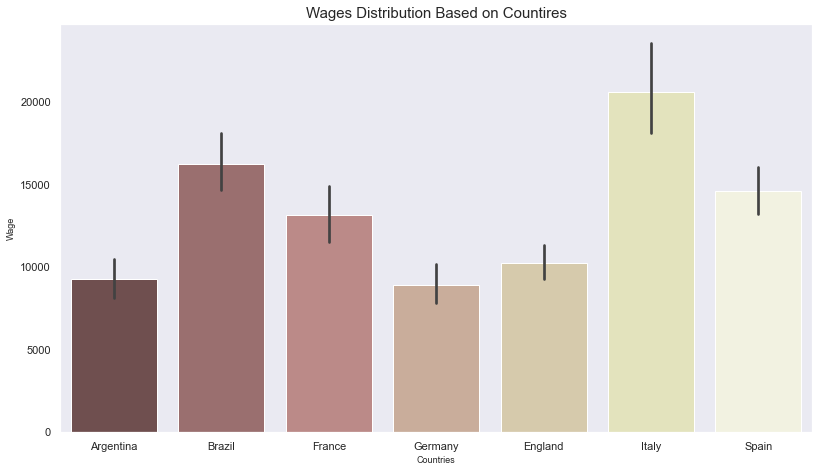

In [195]:
# Every Nations' Player and their wages

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['nationality_name'].isin(some_countries) & data['wage_eur']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.barplot(x = data_countries['nationality_name'], y = data_countries['wage_eur'], palette = 'pink')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Wages Distribution Based on Countires', fontsize = 15)
plt.show()

In [112]:
# finding 15 youngest Players from the dataset

youngest = data.sort_values('age', ascending = True)[['short_name', 'age', 'club_name', 'nationality_name']].head(15)
print(youngest)

              short_name  age               club_name nationality_name
18604             J. Eng   16       Vålerenga Fotball           Norway
16982           T. Small   16             Southampton          England
18776            J. Assi   16   Club de Foot Montréal    Côte d'Ivoire
18779        J. Castilla   16          Houston Dynamo         Colombia
18227        K. Urbański   16                 Bologna           Poland
14281  A. Kalogeropoulos   16          Olympiacos CFP           Greece
18812          F. Draper   16            Lincoln City          England
19095         V. Solheim   16            FK Haugesund           Norway
16303    R. van den Berg   16              PEC Zwolle      Netherlands
18649        H. Skogvold   16           Lillestrøm SK           Norway
18320         A. Kozubal   16             Lech Poznań           Poland
17946       F. Bundgaard   16              Randers FC          Denmark
17930        Z. Emmerson   16  Brighton & Hove Albion          England
16916 

In [198]:
# visualizing clubs with highest number of different countries

data.groupby(data['club_name'])['nationality_name'].nunique().sort_values(ascending = False).head(10)

club_name
Brentford              19
Watford                19
LOSC Lille             19
Eintracht Frankfurt    18
Napoli                 18
Lazio                  18
Torino F.C.            18
Fulham                 18
Arsenal                18
Vejle Boldklub         17
Name: nationality_name, dtype: int64

D:\All\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Comparison of Overall Scores and age wrt Preferred foot')

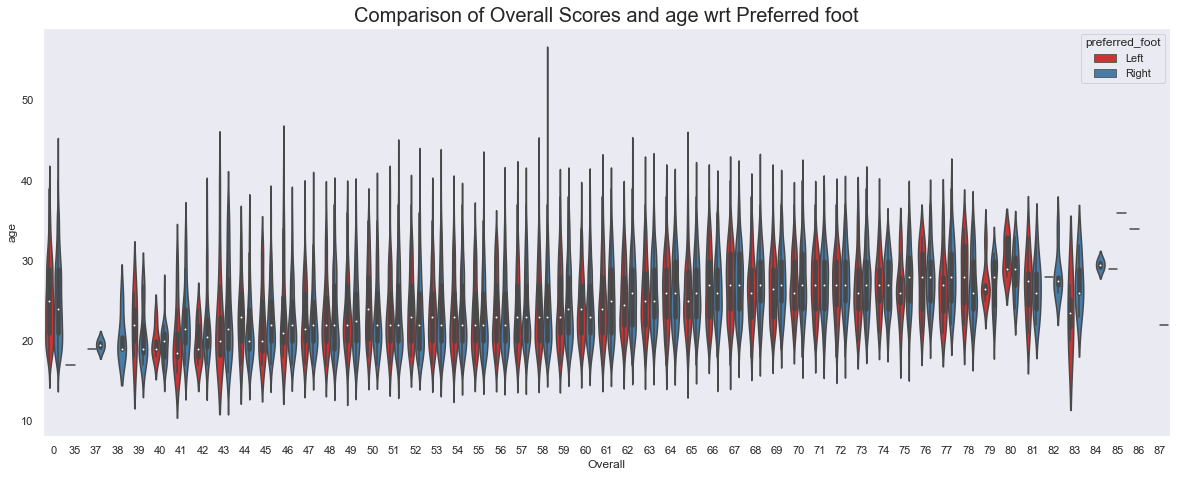

In [114]:
# violin plot 

plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(players['Overall'], data['age'], hue = data['preferred_foot'], palette = 'Set1')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)

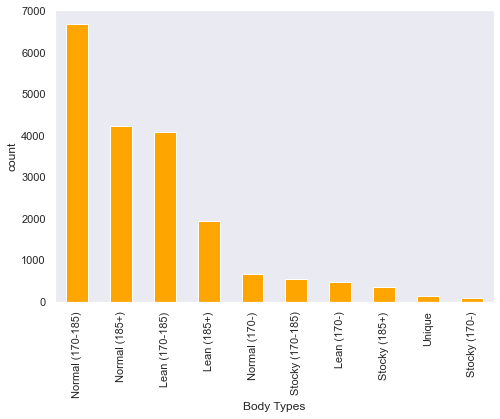

In [201]:
#comparing the different body types of the players participating in FIFA 2019

data['body_type'].value_counts().plot.bar(color = 'orange', figsize = (7, 5))
plt.xlabel('Body Types')
plt.ylabel('count')
plt.show()

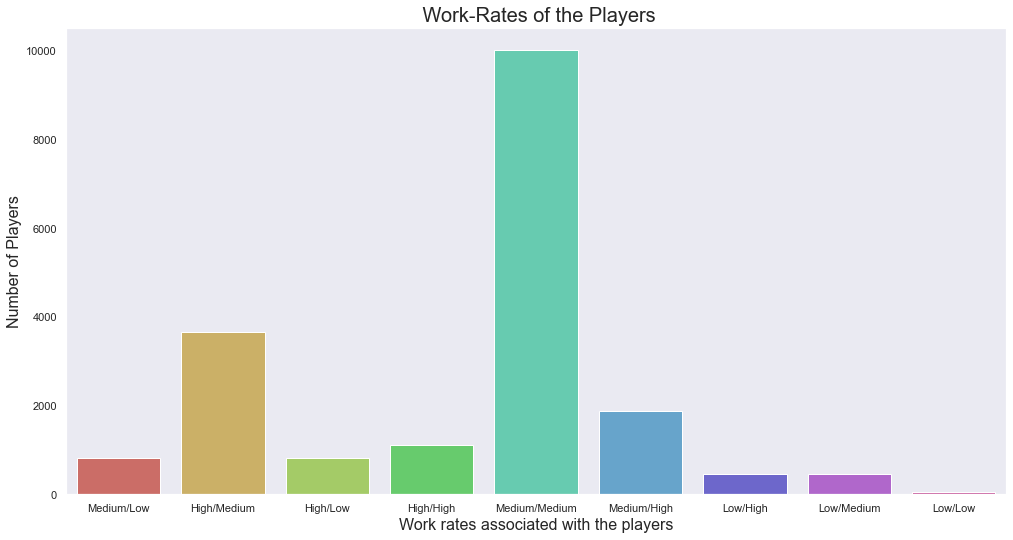

In [203]:
# To show Different Work rate of the players participating in the FIFA 2019

plt.figure(figsize = (15, 8))
sns.countplot(x = 'work_rate', data = data, palette = 'hls')
plt.title(' Work-Rates of the Players', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('Number of Players', fontsize = 16)
plt.show()

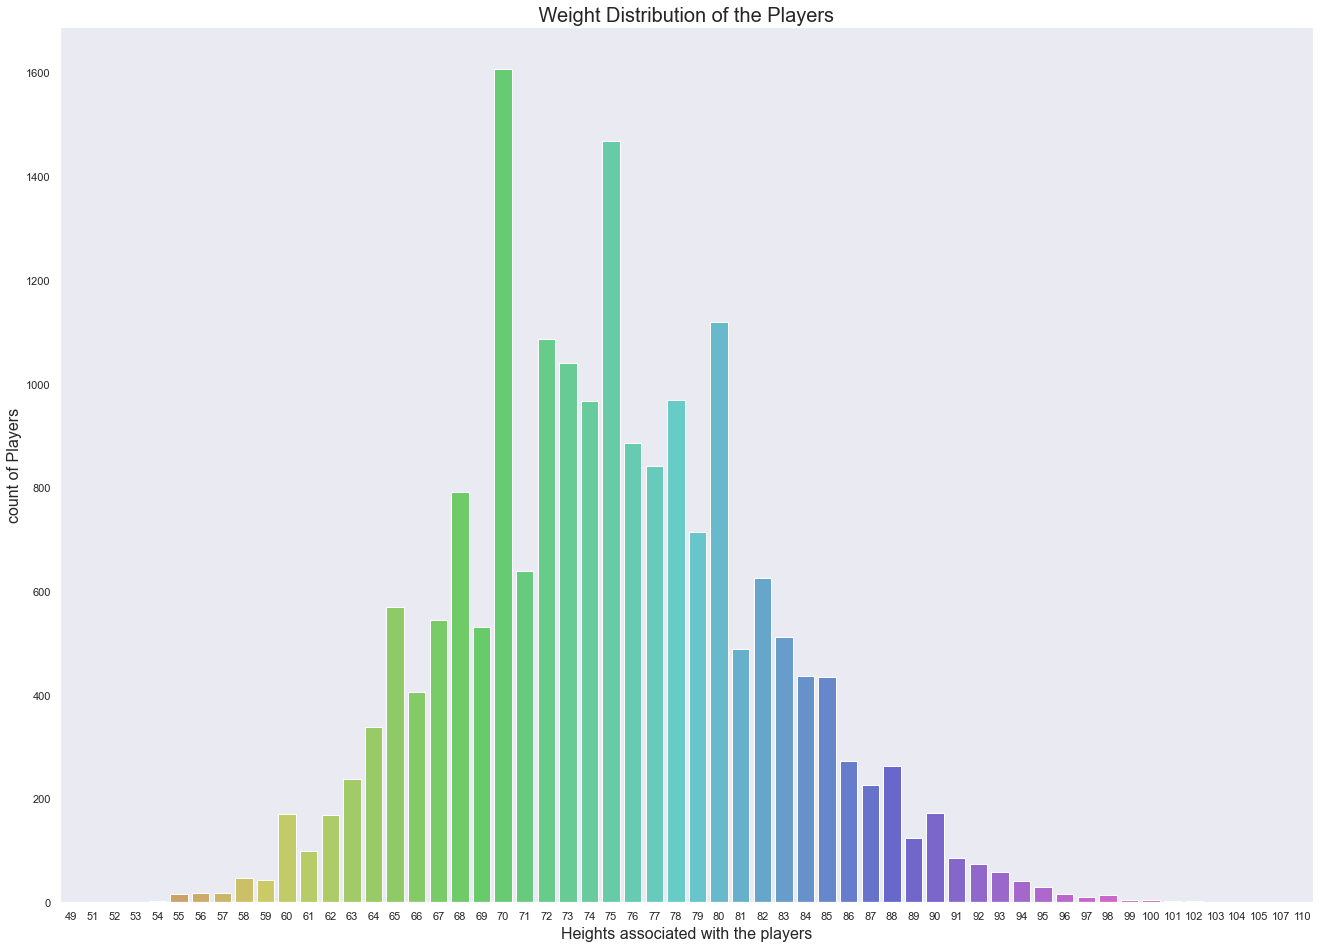

In [207]:
# To show Different body weight of the players participating in the FIFA 2022

plt.figure(figsize = (20, 15))
sns.countplot(x = 'weight_kg', data = data, palette = 'hls')
plt.title(' Weight Distribution of the Players ', fontsize = 20)
plt.xlabel('Heights associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

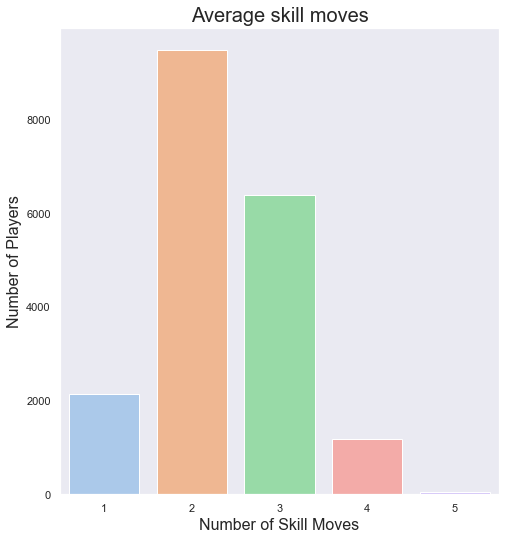

In [209]:
# Skill Moves of Players

plt.figure(figsize = (7, 8))
ax = sns.countplot(x = 'skill_moves', data = data, palette = 'pastel')
ax.set_title(label = 'Average skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
plt.show()

In [213]:
#  comparison of international reputation among the players
data['international_reputation'].value_counts()

1    17850
2     1039
3      285
4       57
5        8
Name: international_reputation, dtype: int64

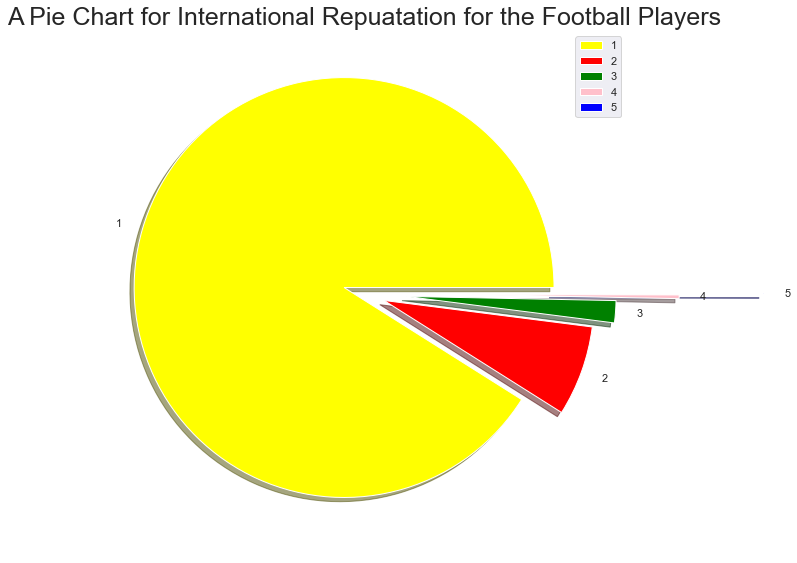

In [215]:
# plotting a pie chart to represent share of international repuatation

labels = ['1', '2', '3', '4', '5']
sizes = [16532, 1261, 309, 51, 6]
colors = ['yellow', 'red', 'green', 'pink', 'blue']
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('A Pie Chart for International Repuatation for the Football Players', fontsize = 25)
plt.legend()
plt.show()

## Predicting best players for most common 15 positions on field 

In [121]:
player_data = players

players['Overall'] = players.apply(lambda row: row['Goalkeeper'] if row['Overall'] == 0 else row['Overall'], axis=1)

# Define the positions we need to fill in our team
positions = ['GK','CB', 'RB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'LW', 'ST','CF','LM','LWB','RM','RWB']

# Filter the data to include only players in the positions we need
filtered_data = player_data[player_data['player_positions'].isin(positions)]

# Sort the filtered data by potential score in descending order
sorted_data = filtered_data.sort_values('Final', ascending=False)

# Initialize variables to keep track of the selected players and the remaining budget
selected_players = []
budget = 7500000000

# Iterate over the sorted data and select the top player for each position, subject to budget constraints
for pos in positions:
    # Get the top player for this position
    top_player = sorted_data[sorted_data['player_positions'] == pos].iloc[0]
    
    # Check if we can afford this player
    if top_player['value_eur'] > budget:
        # If not, skip this position
        continue
    
    # If we can afford the player, add them to the selected players and subtract their value from the budget
    selected_players.append(top_player)
    budget -= top_player['value_eur']

    # If we have run out of budget, stop selecting players
    if budget <= 0:
        break




In [122]:
from tabulate import tabulate

selected_players_table = []

# Add serial number to each player
for i, player in enumerate(selected_players, start=1):
    selected_players_table.append([i, player['short_name'], player['player_positions'], player['Overall']])

print('Best Players with respect to position:')
print(tabulate(selected_players_table, headers=['#', 'Name', 'Position', 'Overall'], tablefmt='fancy_grid'))


Best Players with respect to position:
╒═════╤══════════════╤════════════╤═══════════╕
│   # │ Name         │ Position   │   Overall │
╞═════╪══════════════╪════════════╪═══════════╡
│   1 │ F. Bardi     │ GK         │        68 │
├─────┼──────────────┼────────────┼───────────┤
│   2 │ D. Alaba     │ CB         │        77 │
├─────┼──────────────┼────────────┼───────────┤
│   3 │ A. Hakimi    │ RB         │        81 │
├─────┼──────────────┼────────────┼───────────┤
│   4 │ T. Hernández │ LB         │        81 │
├─────┼──────────────┼────────────┼───────────┤
│   5 │ F. Kessié    │ CDM        │        79 │
├─────┼──────────────┼────────────┼───────────┤
│   6 │ K. De Bruyne │ CM         │        84 │
├─────┼──────────────┼────────────┼───────────┤
│   7 │ N. Fekir     │ CAM        │        83 │
├─────┼──────────────┼────────────┼───────────┤
│   8 │ L. Messi     │ RW         │        86 │
├─────┼──────────────┼────────────┼───────────┤
│   9 │ S. Mané      │ LW         │        84 │
├

# Match Prediction using Machine Learning Algorithm

In [35]:
Predict_data=pd.read_csv('EP.csv')
Predict_data = Predict_data.dropna()
data = Predict_data 
data

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,5/8/2022,20:00,Crystal Palace,Arsenal,0.0,2.0,A,0.0,1.0,...,1.76,0.50,2.09,1.84,2.04,1.88,2.09,1.88,2.03,1.85
1,E0,6/8/2022,12:30,Fulham,Liverpool,2.0,2.0,D,1.0,0.0,...,2.73,1.75,1.90,2.03,1.91,2.02,2.01,2.06,1.89,1.99
2,E0,6/8/2022,15:00,Bournemouth,Aston Villa,2.0,0.0,H,1.0,0.0,...,1.76,0.50,1.93,2.00,1.93,2.00,1.94,2.04,1.88,2.00
3,E0,6/8/2022,15:00,Leeds,Wolves,2.0,1.0,H,1.0,1.0,...,1.87,-0.25,2.08,1.85,2.10,1.84,2.14,1.87,2.08,1.81
4,E0,6/8/2022,15:00,Newcastle,Nott'm Forest,2.0,0.0,H,0.0,0.0,...,1.89,-1.00,1.97,1.96,1.99,1.93,2.19,1.97,2.03,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,E0,26/07/2020,16:00,Leicester,Man United,0.0,2.0,A,0.0,0.0,...,2.03,0.50,1.89,2.01,1.88,2.05,1.94,2.05,1.86,2.02
1422,E0,26/07/2020,16:00,Man City,Norwich,5.0,0.0,H,2.0,0.0,...,5.77,-3.75,2.03,1.87,2.01,1.88,2.06,1.88,2.02,1.84
1423,E0,26/07/2020,16:00,Newcastle,Liverpool,1.0,3.0,A,1.0,1.0,...,2.40,1.00,1.94,1.96,1.95,1.97,2.03,2.00,1.95,1.92
1424,E0,26/07/2020,16:00,Southampton,Sheffield United,3.0,1.0,H,0.0,1.0,...,2.01,-0.50,1.97,1.93,2.00,1.93,2.03,1.96,1.98,1.89


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from time import time
from sklearn.metrics import f1_score
from os import path, makedirs, walk
from joblib import dump, load
import json

In [37]:
def train_classifier(clf, X_train_data, y_train_data):
    start_time = time()
    clf.fit(X_train_data, y_train_data)
    end_time = time()
    print("Classifier trained in {:2f} seconds".format(end_time - start_time))


def predict_labels(clf, features, target):
    start_time = time()
    predicted_labels = clf.predict(features)
    end_time = time()
    print("Labels predicted in {:2f} seconds".format(end_time - start_time))

    accuracy = sum(target == predicted_labels) / float(len(predicted_labels))

    return f1_score(target, predicted_labels, average='micro'), accuracy


def run_model(clf, X_train_data, y_train_data, X_test_data, y_test_data):
    train_classifier(clf, X_train_data, y_train_data)

    f1, acc = predict_labels(clf, X_train_data, y_train_data)
    print("Training Results:")
    print("-" * 20)
    print("F1 Score:{}".format(f1))
    print("Accuracy:{}".format(acc*100))

    f1, acc = predict_labels(clf, X_test_data, y_test_data)
    print("Test Results:")
    print("-" * 20)
    print("F1 Score:{}".format(f1))
    print("Accuracy:{}".format(acc*100))


def get_clean_sheets(source_data):
    arr = []
    num_rows = source_data.shape[0]

    for i in range(num_rows):

        #[HTHG, HTAG]
        values = source_data.iloc[i].values
        cs = [0, 0]

        if values[0] == 0:
            cs[1] = 1

        if values[1] == 0:
            cs[0] = 1

        arr.append(cs)

    return arr


In [38]:
# Preprocessing

# Define input and output features to consider
input_features = ['home_encoded', 'away_encoded', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HR', 'AR']
output_feature = ['FTR']

# Combine input and output features
features_to_consider = input_features + output_feature

# Encode home team names and store mapping for later use
home_team_encoder = LabelEncoder()
home_team_encoded = home_team_encoder.fit_transform(data['HomeTeam'])
home_team_encoded_mapping = dict(zip(home_team_encoder.classes_, home_team_encoder.transform(home_team_encoder.classes_).tolist()))
data['home_encoded'] = home_team_encoded

# Encode away team names and store mapping for later use
away_team_encoder = LabelEncoder()
away_team_encoded = away_team_encoder.fit_transform(data['AwayTeam'])
away_team_encoded_mapping = dict(zip(away_team_encoder.classes_, away_team_encoder.transform(away_team_encoder.classes_).tolist()))
data['away_encoded'] = away_team_encoded


In [39]:
# Select the columns to include in the data
selected_data = data[features_to_consider]

# Check for missing values in the data and print any rows with missing values
missing_values = selected_data[selected_data.isna().any(axis=1)]
print(missing_values)

# Drop any rows with missing values
clean_data = selected_data.dropna(axis=0)


Empty DataFrame
Columns: [home_encoded, away_encoded, HTHG, HTAG, HS, AS, HST, AST, HR, AR, FTR]
Index: []


In [42]:
# Select the input and output features from the data
input_features = data[input_filter]
output_feature = data['FTR']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(input_features, output_feature, test_size=0.2)

# Initialize the classifiers
svc_classifier = SVC(random_state=100, kernel='rbf')
lr_classifier = LogisticRegression(multi_class='ovr', max_iter=500)
nb_classifier = GaussianNB()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()

# Uncomment the following code to use the support vector machine classifier
print("Support Vector Machine")
print("-" * 20)
model(svc_classifier, X_train, Y_train, X_test, Y_test)

# Use the logistic regression classifier and print the results
print()
print("Logistic Regression one vs All Classifier")
print("-" * 20)
model(lr_classifier, X_train, Y_train, X_test, Y_test)

# Use the Gaussian naive Bayes classifier and print the results
print()
print("Gaussian Naive Bayes Classifier")
print("-" * 20)
model(nb_classifier, X_train, Y_train, X_test, Y_test)


Support Vector Machine
--------------------
Classifier trained in 0.073804 seconds
Labels predicted in 0.119500 seconds
Training Info:
--------------------
F1 Score:0.6487676056338029
Accuracy:64.87676056338029
Labels predicted in 0.033563 seconds
Test Metrics:
--------------------
F1 Score:0.6091549295774648
Accuracy:60.91549295774647

Logistic Regression one vs All Classifier
--------------------
Classifier trained in 0.101078 seconds
Labels predicted in 0.001003 seconds
Training Info:
--------------------
F1 Score:0.6786971830985915
Accuracy:67.86971830985915
Labels predicted in 0.002506 seconds
Test Metrics:
--------------------
F1 Score:0.647887323943662
Accuracy:64.7887323943662

Gaussian Naive Bayes Classifier
--------------------
Classifier trained in 0.004003 seconds
Labels predicted in 0.002523 seconds
Training Info:
--------------------
F1 Score:0.6382042253521126
Accuracy:63.820422535211264
Labels predicted in 0.002001 seconds
Test Metrics:
--------------------
F1 Score:0.5

In [217]:
print("Random Forest Classifier")
print("-" * 20)
model(rfClassifier, X_train, Y_train, X_test, Y_test)

Random Forest Classifier
--------------------
Classifier trained in 0.237598 seconds
Labels predicted in 0.030567 seconds
Training Info:
--------------------
F1 Score:1.0
Accuracy:100.0
Labels predicted in 0.016517 seconds
Test Metrics:
--------------------
F1 Score:0.5845070422535211
Accuracy:58.45070422535211
